# Phase 1: Exploratory Data Analysis (EDA) & Data Quality Report

## 1. Loading dataset & Importing libraries

In [188]:
# from google.colab import files
# uploaded = files.upload()

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import calendar
from sklearn.model_selection import train_test_split

df = pd.read_csv('hotel_bookings.csv')

## 2. Overview

In [190]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [191]:
print(f'Shape: {df.shape}')
df.info()

Shape: (119390, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 

In [192]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## 3. Checking missing values

In [193]:
df.replace(['null', '', 'NULL', 'NaN'], np.nan, inplace=True) # Replacing nulls with np.nan to make sure it counts right

print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

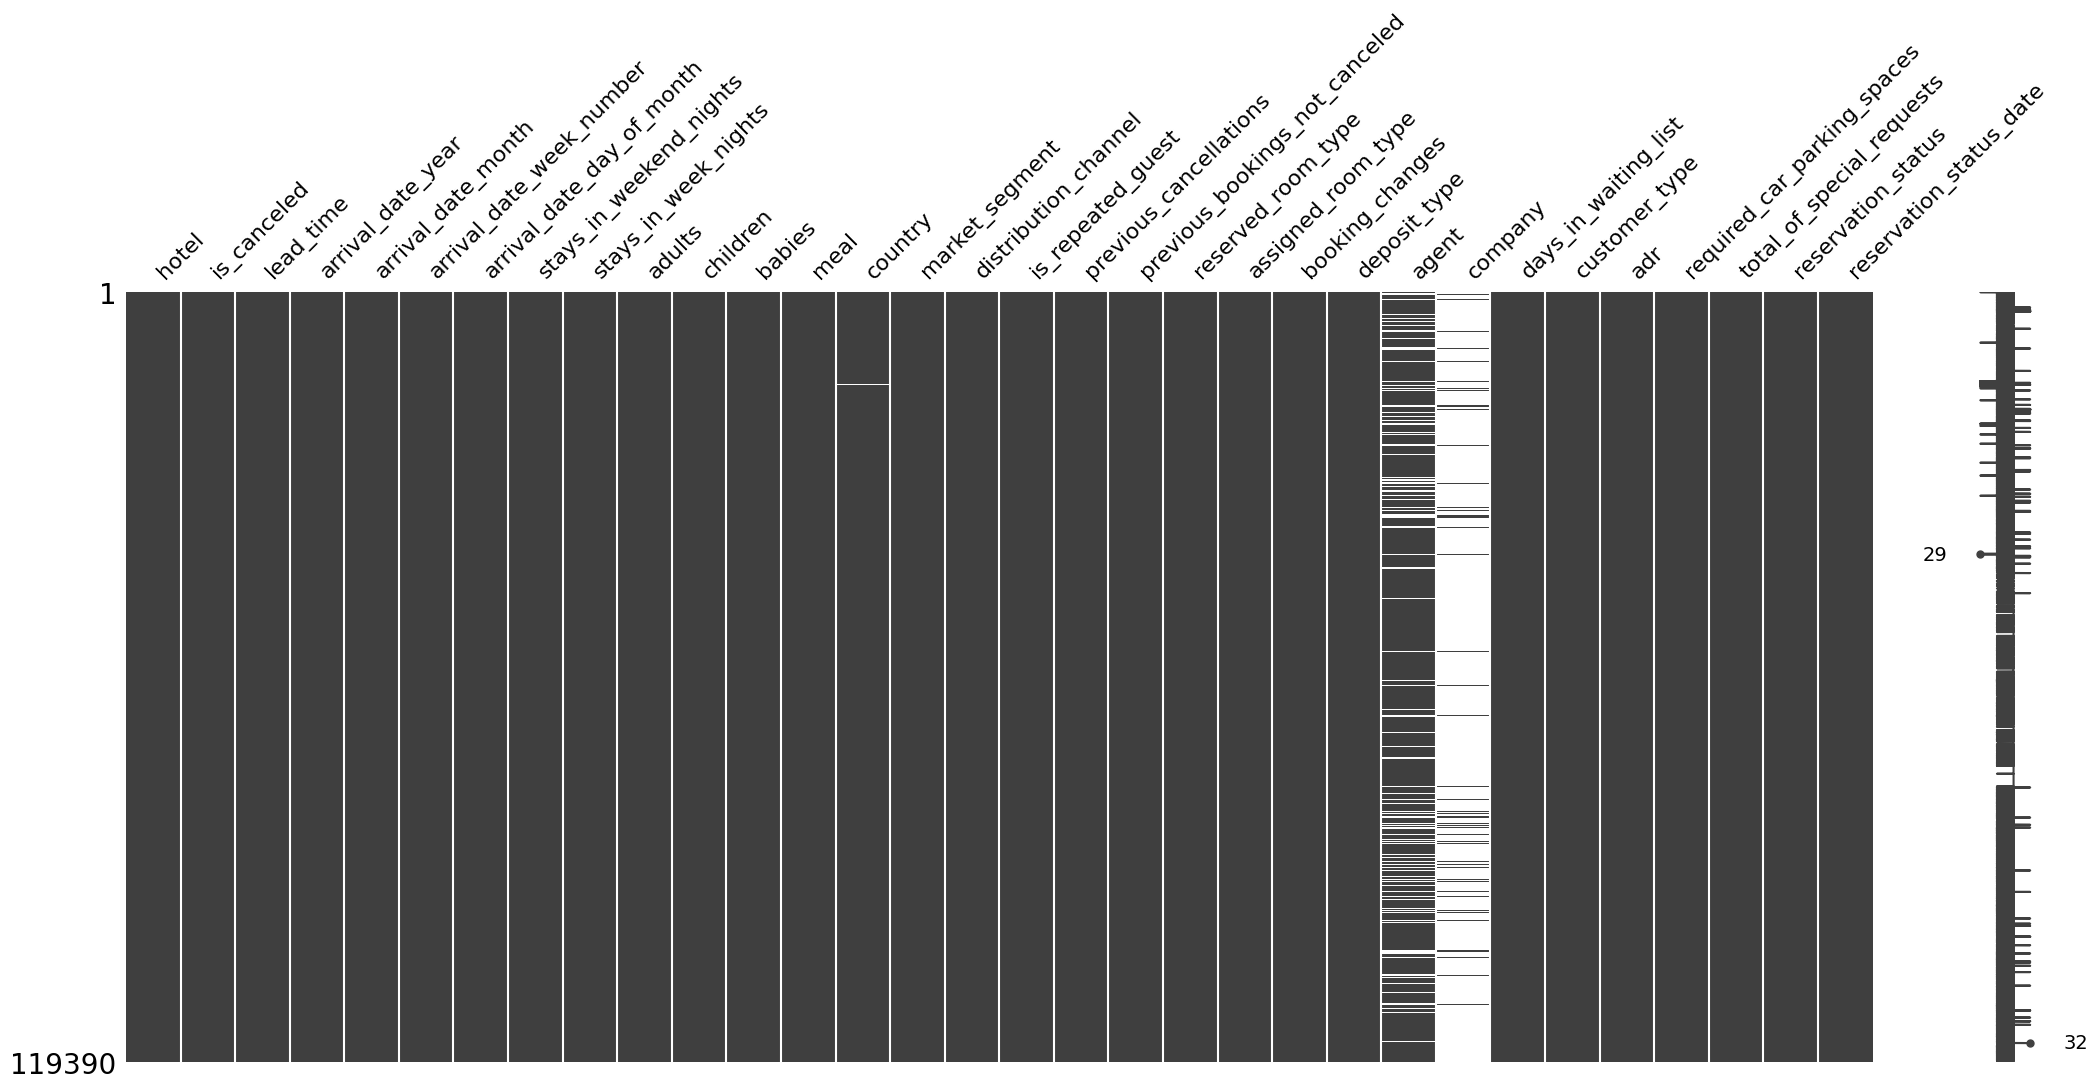

In [194]:
msno.matrix(df)
plt.show()

## 4. Checking outliers

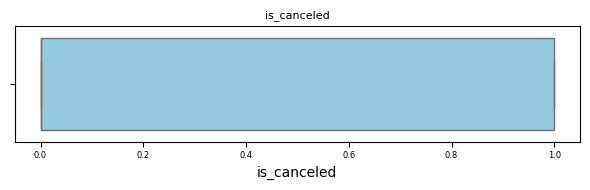

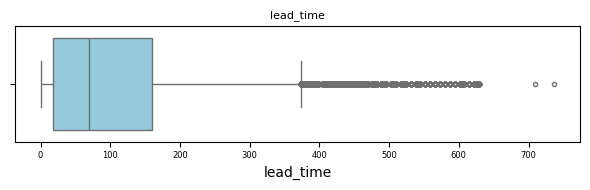

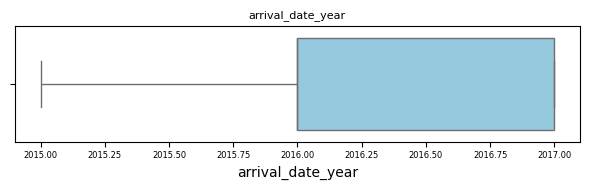

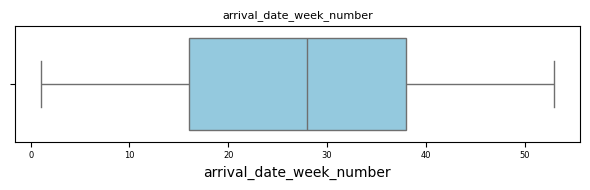

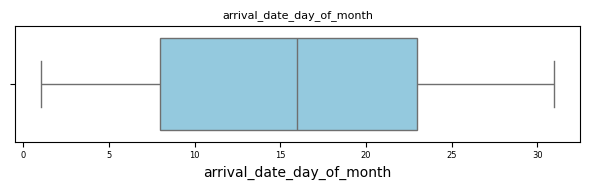

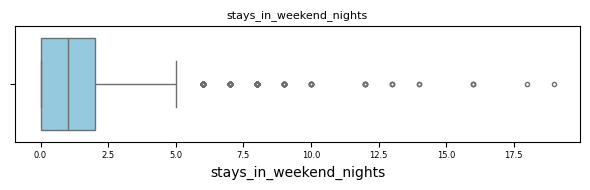

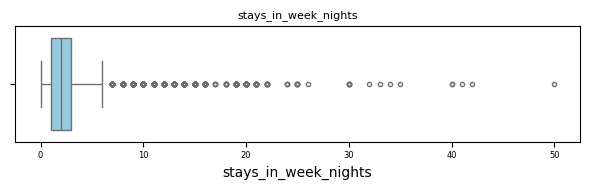

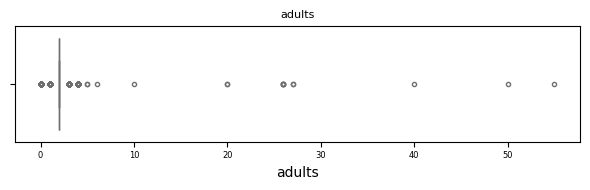

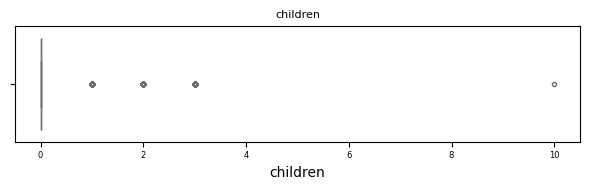

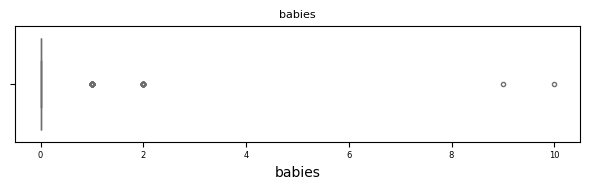

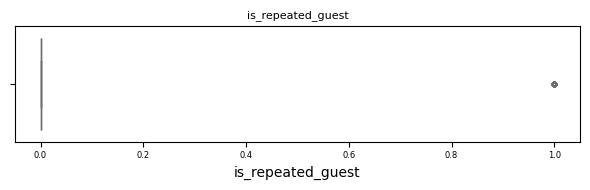

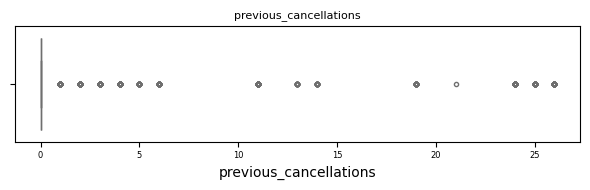

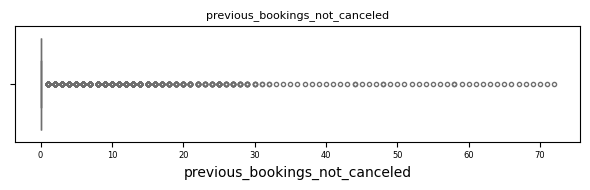

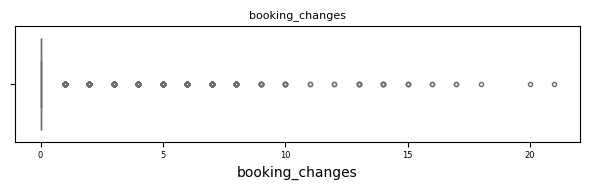

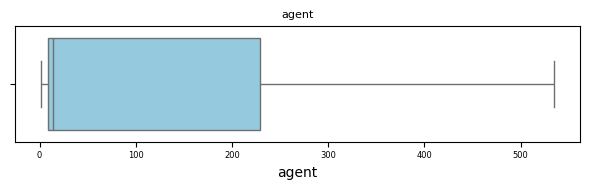

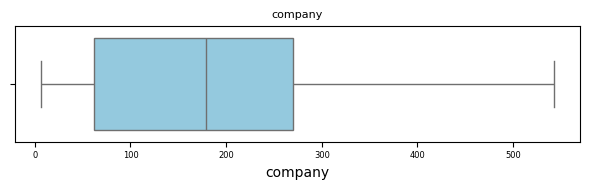

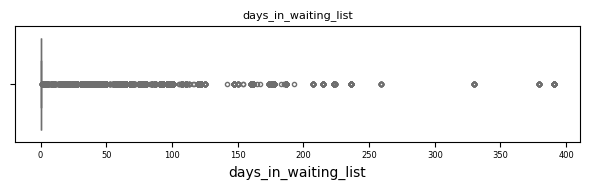

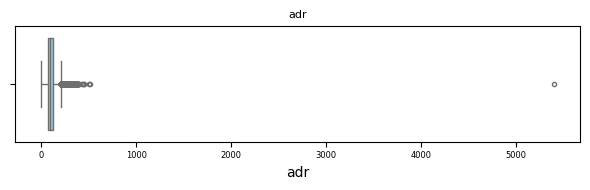

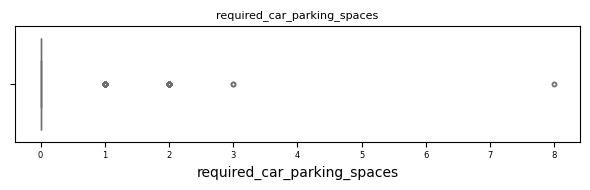

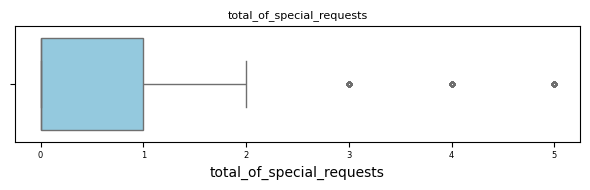

In [195]:
numeric_cols = [
    'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number',
    'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
    'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
    'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests'
]

for col in numeric_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col], color='skyblue', fliersize=3)
    plt.title(col, fontsize=8)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.tight_layout()
    plt.show()

In [196]:
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = series[(series < lower) | (series > upper)]
    return outliers

# Outliers report
outliers_summary = {}
for col in numeric_cols:
    outliers_summary[col] = len(detect_outliers_iqr(df[col]))

# Display summary
outliers_summary


{'is_canceled': 0,
 'lead_time': 3005,
 'arrival_date_year': 0,
 'arrival_date_week_number': 0,
 'arrival_date_day_of_month': 0,
 'stays_in_weekend_nights': 265,
 'stays_in_week_nights': 3354,
 'adults': 29710,
 'children': 8590,
 'babies': 917,
 'is_repeated_guest': 3810,
 'previous_cancellations': 6484,
 'previous_bookings_not_canceled': 3620,
 'booking_changes': 18076,
 'agent': 0,
 'company': 0,
 'days_in_waiting_list': 3698,
 'adr': 3793,
 'required_car_parking_spaces': 7416,
 'total_of_special_requests': 2877}

## 5. Data Quality Report



1.   Nulls:
      *   `children` has **4** nulls
          *   Will impute using either median or mode
      *   `country` has **488** nulls  
          *   Will impute using mode
      *   `agent` has **16340** nulls
          *   Will replace missing values with 0
      *   `company` has **112593** nulls
          *   Will replace missing values with 0



2.   Outliers:
      *   Found extreme outliers in the following columns:
          - `lead_time`
          - `adr`
          - `stays_in_week_nights`
          - `adults`
          - `children`
          - `booking_changes`

# Phase 2: Data Cleaning (The Core of the Project)

## 1. Handling missing values & duplicates


In [197]:
df['company'] = df['company'].fillna(0).astype(int)  # Company
df['agent'] = df['agent'].fillna(0).astype(int)      # Agent

# Country
mode_country = df['country'].mode()[0]
df['country'] = df['country'].fillna(mode_country)

# Children
df['children'] = df['children'].fillna(df['children'].median())

In [198]:
df = df.drop_duplicates()

print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [199]:
print(f'Shape: {df.shape}')
df.head()

Shape: (87377, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 2. Handling outliers


In [200]:
numeric_cols_to_cap = [
    'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
    'children', 'babies', 'booking_changes'
]

# Function to cap outliers based on percentiles
def cap_outliers(series, lower_percentile=0.01, upper_percentile=0.99):
    lower = series.quantile(lower_percentile)
    upper = series.quantile(upper_percentile)
    series = np.where(series < lower, lower, series)
    series = np.where(series > upper, upper, series)
    return series

for col in numeric_cols_to_cap:
    df[col] = cap_outliers(df[col])

# Special case: Cap adr at 1000
df['adr'] = df['adr'].clip(upper=1000)

# Special case: Cap lead_time at 365
df['lead_time'] = df['lead_time'].clip(upper=365)

In [201]:
# Outliers report
outliers_summary = {}
for col in numeric_cols:
    outliers_summary[col] = len(detect_outliers_iqr(df[col]))

# Display summary
outliers_summary

{'is_canceled': 0,
 'lead_time': 2396,
 'arrival_date_year': 0,
 'arrival_date_week_number': 0,
 'arrival_date_day_of_month': 0,
 'stays_in_weekend_nights': 0,
 'stays_in_week_nights': 1531,
 'adults': 22887,
 'children': 8364,
 'babies': 914,
 'is_repeated_guest': 3415,
 'previous_cancellations': 1685,
 'previous_bookings_not_canceled': 3545,
 'booking_changes': 15901,
 'agent': 0,
 'company': 5255,
 'days_in_waiting_list': 860,
 'adr': 2488,
 'required_car_parking_spaces': 7313,
 'total_of_special_requests': 2672}

## 3. Fixing Data Types

In [202]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Map month names to numbers
month_mapping = {month: index for index, month in enumerate(calendar.month_name) if month}

df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'].map(month_mapping).astype(str) + '-' +
    df['arrival_date_day_of_month'].astype(str)
)

In [203]:
print(df.dtypes[['reservation_status_date', 'arrival_date']])

df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date']].head()


reservation_status_date    datetime64[ns]
arrival_date               datetime64[ns]
dtype: object


,arrival_date_year,arrival_date_month,arrival_date_day_of_month,arrival_date
0,2015,July,1,2015-07-01
1,2015,July,1,2015-07-01
2,2015,July,1,2015-07-01
3,2015,July,1,2015-07-01
4,2015,July,1,2015-07-01


## 4. Data Cleaning Summary



1.   Nulls:
      *   `children` imputed using median
      *   `country` imputed using mode
      *   `agent` replaced missing values with 0
      *   `company` replaced missing values with 0

2.   Duplicates:
      *   Dropped duplicate rows

3.   Outliers:
      *   Applied percentile capping (1st–99th) for: `stays_in_weekend_nights`, `stays_in_week_nights`, `adults`, `children`, `babies`, `booking_changes`
      *   Special handling:
          * For `adr`, capped values above 1000 at 1000
          * For `lead_time`, capped values above 365 at 365
      *   Justification: These rules remove unrealistic values while keeping the overall distribution. Percentile capping reduces noise, and hard caps prevent extreme outliers from skewing results.

4.   Data Types:
      *   Converted `reservation_status_date` into datetime format
      *   Created a new `arrival_date` column by combining year, month, and day into a proper datetime.

# Phase 3: Feature Engineering & Preprocessing

## 1. Creating New Features

In [204]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']

df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

df['is_family'] = ((df['children'] > 0) | (df['babies'] > 0)).astype(int)

## 2. Encoding Categorical Variables

In [205]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_guests,total_nights,is_family
0,Resort Hotel,0,342.0,2015,July,27,1,0.0,0.0,2.0,...,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2.0,0.0,0
1,Resort Hotel,0,347.0,2015,July,27,1,0.0,0.0,2.0,...,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2.0,0.0,0
2,Resort Hotel,0,7.0,2015,July,27,1,0.0,1.0,1.0,...,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1.0,1.0,0
3,Resort Hotel,0,13.0,2015,July,27,1,0.0,1.0,1.0,...,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1.0,1.0,0
4,Resort Hotel,0,14.0,2015,July,27,1,0.0,2.0,2.0,...,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2.0,2.0,0


In [206]:
# One-Hot Encoding (low-cardinality)
low_cardinality_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel',
                        'reserved_room_type', 'assigned_room_type',
                        'deposit_type', 'customer_type']

df = pd.get_dummies(df, columns=low_cardinality_cols, drop_first=True)

# Frequency Encoding (high-cardinality)
# Replace rare categories with "Other"
threshold = 0.01  # 1% of data
country_counts = df['country'].value_counts(normalize=True)
rare_countries = country_counts[country_counts < threshold].index

df['country'] = df['country'].replace(rare_countries, 'Other')

# Frequency Encoding for remaining countries
country_freq = df['country'].value_counts(normalize=True)
df['country'] = df['country'].map(country_freq)

In [207]:
# Convert all boolean columns to integers (0/1)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

df[bool_cols].head()


print("Data shape after encoding:", df.shape)
df.head()

Data shape after encoding: (87377, 69)


,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342.0,2015,July,27,1,0.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0,347.0,2015,July,27,1,0.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0,7.0,2015,July,27,1,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0,13.0,2015,July,27,1,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0,14.0,2015,July,27,1,0.0,2.0,2.0,0.0,...,0,0,0,0,0,0,0,0,1,0


## 3. Removing Data Leakage

In [209]:
df = df.drop(['reservation_status', 'reservation_status_date'], axis=1)

## 4. Splitting the cleaned dataset

In [210]:
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (69901, 66)
Test shape: (17476, 66)


## 5. Feature Engineering & Preprocessing Summary



1. New Features
   - `total_guests` = `adults` + `children` + `babies`
   - `total_nights` = `stays_in_weekend_nights` + `stays_in_week_nights`
   - `is_family` = binary flag (1 if children or babies > 0, else 0)

2. Encoding
   - Applied **One-Hot Encoding** for low-cardinality variables (`hotel`, `meal`, `market_segment`, `distribution_channel`, `reserved_room_type`, `assigned_room_type`, `deposit_type`, `customer_type`)
   - For `country`, grouped rare categories (<1% frequency) into **"Other"**, then applied **frequency encoding**
   - Converted all **boolean columns** to integers (0/1) for ML compatibility

3. Data Leakage Prevention
   - Dropped `reservation_status` and `reservation_status_date`

4. Final Preparation
   - Split dataset into **train (80%)** and **test (20%)** using stratified sampling on `is_canceled`